# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [31]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

pd.set_option('display.max_columns', None)

sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [13]:
sis = sinasc_raw
sis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
sis['Latitude_Faixa'] = pd.cut(sis['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])

grouped_lat = sis.groupby('Latitude_Faixa').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

grouped_lat

IDADEMAE                                                 \
                     sum       mean min max median       std        var   
Latitude_Faixa                                                            
Abaixo de -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                QTDFILVIVO                                                  
                       sum      mean  min   max median       std       var  
Latitude_Faixa                                                              
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727  
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [25]:
sinasc_raw['Area_Faixa'] = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

grouped_area = sinasc_raw.groupby('Area_Faixa').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

grouped_area

IDADEMAE                                                 \
                    sum       mean min max median       std        var   
Area_Faixa                                                               
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

                    PESO                                              \
                     sum         mean  min   max  median         std   
Area_Faixa                                                             
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                               
                          var  
Area_Faixa                     
Abaixo de 3000  282580.595074  
Acima de 3000   299993.453720

In [26]:
grouped_area = sinasc_raw.groupby('Area_Faixa').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
grouped_area

QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
Area_Faixa                                                                  
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
Area_Faixa                                                                 
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [28]:
sinasc_raw['Altitude_Faixa'] = pd.cut(sinasc_raw['munResAlt'], bins=5)

grouped_alt = sinasc_raw.groupby('Altitude_Faixa').agg({
    'CODOCUPMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'HORANASC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

grouped_alt

CODOCUPMAE                                               \
                         sum           mean       min       max    median   
Altitude_Faixa                                                              
(84.49, 187.0]  1.445670e+10  808675.739665   10205.0  999994.0  999992.0   
(187.0, 289.0]  3.054802e+09  773955.425893   31210.0  999994.0  999992.0   
(289.0, 391.0]  3.621295e+08  752868.079002  141405.0  999994.0  763215.0   
(391.0, 493.0]  2.519108e+08  734433.688047   21205.0  999994.0  622020.0   
(493.0, 595.0]  1.064474e+09  723148.217391   21205.0  999994.0  999991.0   

                                               HORANASC                    \
                          std           var         sum         mean  min   
Altitude_Faixa                                                              
(84.49, 187.0]  282454.823039  7.978073e+10  25519241.0  1267.721858  0.0   
(187.0, 289.0]  271360.889399  7.363673e+10   5504747.0  1266.623792  0.0   
(289.0, 391.0]  268880.808867  7.229689e+10    756522.0  1322.590909  1.0   
(391.0, 493.0]  280168.253467  7.849425e+10    462250.0  1256.114130  5.0   
(493.0, 595.0]  320150.978268  1.024966e+11   1985744.0  1248.895597  0.0   

                                                           
                   max  median         std            var  
Altitude_Faixa                                             
(84.49, 187.0]  2359.0  1235.0  592.931888  351568.223344  
(187.0, 289.0]  2356.0  1223.0  515.970517  266225.574661  
(289.0, 391.0]  2356.0  1405.5  536.766701  288118.490845  
(391.0, 493.0]  2358.0  1146.0  574.537851  330093.741707  
(493.0, 595.0]  2358.0  1147.5  504.450262  254470.067130

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [18]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

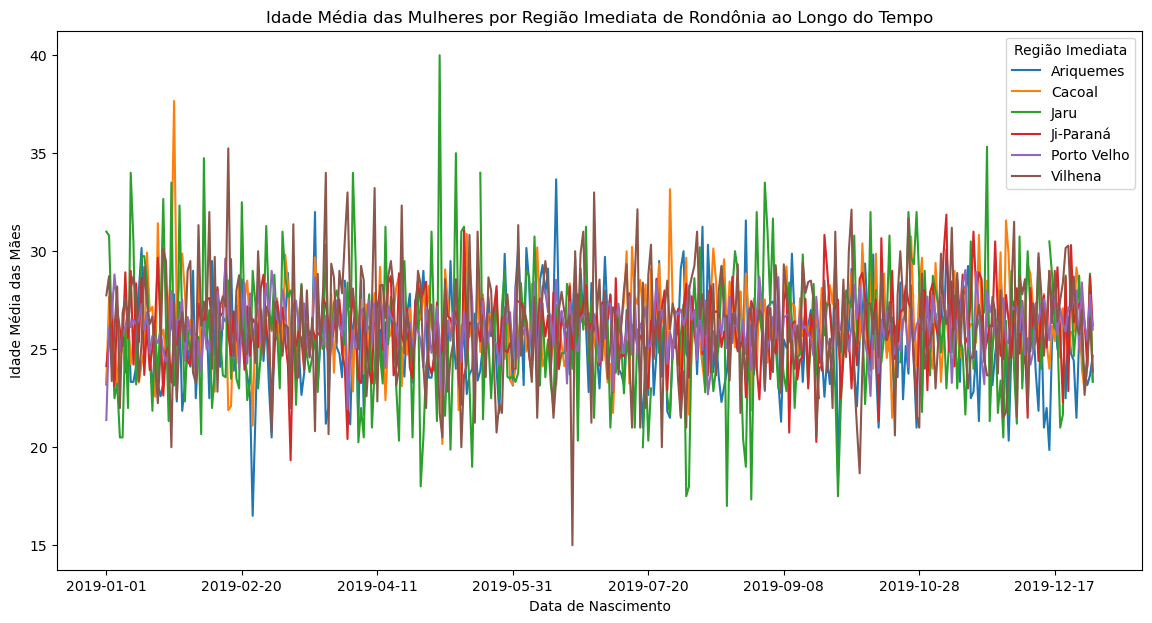

In [23]:
# Mapeamento das regiões imediatas
sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Agrupamento e cálculo da idade média por região imediata e data de nascimento
idade_media_regiao = sinasc_raw.groupby(['Regiao_Imediata', 'DTNASC'])['IDADEMAE'].mean().unstack(level=0)

# Plotagem das séries temporais das médias de idade por região imediata
idade_media_regiao.plot(figsize=(14, 7))
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [41]:
# Definir as faixas de IDH
idh_alto = ["Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura"]
idh_medio = ["Cerejeiras", "Jaru", "Colorado do Oeste", "Ouro Preto do Oeste", "Espigão d'Oeste", "Santa Luzia d'Oeste", "Pimenteiras do Oeste", "Presidente Médici", "Castanheiras", "Guajará-Mirim", "Chupinguaia", "Cabixi", "Candeias do Jamari", "São Felipe d'Oeste", "Cacaulândia", "São Miguel do Guaporé", "Mirante da Serra", "Alvorada d'Oeste", "Teixeirópolis", "Nova Brasilândia d'Oeste", "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste", "Ministro Andreazza", "Novo Horizonte do Oeste", "Vale do Paraíso", "Alto Paraíso", "Parecis", "Buritis", "Itapuã do Oeste", "Corumbiara", "Cujubim", "Costa Marques", "São Francisco do Guaporé", "Urupá", "Monte Negro"]
idh_baixo = ["Seringueiras", "Governador Jorge Teixeira", "Machadinho d'Oeste", "Campo Novo de Rondônia", "Alto Alegre dos Parecis", "Theobroma", "Nova União", "Nova Mamoré", "Vale do Anari"]

# Criar coluna de faixas de IDH
sinasc_raw['IDH_Faixa'] = sinasc_raw['munResNome'].apply(lambda x: 'IDH Alto' if x in idh_alto else ('IDH Médio' if x in idh_medio else 'IDH Baixo'))

# Agrupar e agregar os dados
grouped_idh = sinasc_raw.groupby('IDH_Faixa').agg({
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']


})

In [42]:
# Definir a ordem desejada das faixas de IDH
ordem_idh = ['IDH Baixo', 'IDH Médio', 'IDH Alto']

# Reindexar o DataFrame grouped_idh com a ordem desejada
grouped_idh = grouped_idh.reindex(ordem_idh)

# Exibir o resultado
grouped_idh

CONSULTAS                                                   PESO  \
                sum      mean min max median       std       var       sum   
IDH_Faixa                                                                    
IDH Baixo     11909  3.649709   1   9    4.0  0.680511  0.463095  10524386   
IDH Médio     25317  3.663821   1   9    4.0  0.690700  0.477067  22427582   
IDH Alto      59437  3.526372   1   9    4.0  0.839712  0.705116  54704989   

                                                                      \
                  mean  min   max  median         std            var   
IDH_Faixa                                                              
IDH Baixo  3225.371131  370  5985  3250.0  539.271375  290813.616052   
IDH Médio  3245.670333  258  5190  3270.0  528.702466  279526.297730   
IDH Alto   3245.623791  292  5720  3275.0  552.210169  304936.070574   

          QTDFILVIVO                                                  \
                 sum      mean  min   max median       std       var   
IDH_Faixa                                                              
IDH Baixo     3379.0  1.070998  0.0  30.0    1.0  1.247457  1.556150   
IDH Médio     7220.0  1.093111  0.0  14.0    1.0  1.226458  1.504200   
IDH Alto     16228.0  1.033960  0.0  12.0    1.0  1.129922  1.276724   

          QTDFILMORT                                                  
                 sum      mean  min   max median       std       var  
IDH_Faixa                                                             
IDH Baixo      700.0  0.225588  0.0   9.0    0.0  0.561524  0.315309  
IDH Médio     1743.0  0.272386  0.0   7.0    0.0  0.589349  0.347332  
IDH Alto      4201.0  0.272297  0.0  28.0    0.0  0.633392  0.401185

#### Aqui, é possível perceber que:
        1. CONSULTAS:
            - A média de consultas para os grupos de IDH é a mesma, só mudando, praticamente, a quantidade de consultas. É provável que isso aconteça por haver maior população nos municípios de IDH Alto do que nos outros (entre eles, a capital do Estado);
            
         2. PESO:
             - Na mesma linha, a soma dos valores é crescente segundo a faixa. Quanto à média, vemos que ela é menor no grupo em que o IDH é baixo (mesmo que pouco). Isso pode significar uma situação de alerta, uma vez que a desnutrição pode acarretar problemas para os nascituros. 
         
         
         3. Quantidade de Filhos Vivos:
             - Aqui, apesar da proximidade entre os valores, a quantidade de filhos nascidos vivos no grupo IDH ALTO é menor que nos demais. O desvio padrão fazz crer que há um padrão maior nesses dados no que nos outros dois grupos.
         
         4. Quantidade de Filhos Mortos:
              - Nesse caso, os dados estão melhores no IDH Baixo, depois Médio, depois Alto. Esse último, amargando a maior média por quantidade de filhos mortos. Talvez, novamente, seja a maior quantidade populacional. Mas é uma questão importante a ser investigada.      
         
         

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [49]:
# Definir corretamente as faixas de IFDM
ifdm_regular = ["Ariquemes", "Vilhena", "Pimenta Bueno", "Porto Velho", "Ji-Paraná", "Cacoal", "Santa Luzia d'Oeste", 
                "Rolim de Moura", "Chupinguaia", "São Miguel do Guaporé", "Pimenteiras do Oeste", "Teixeirópolis", 
                "Colorado do Oeste", "Jaru", "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste", 
                "Ouro Preto do Oeste", "São Francisco do Guaporé", "Candeias do Jamari", "Buritis", "São Felipe d'Oeste", 
                "Presidente Médici", "Cerejeiras", "Monte Negro", "Urupá"]
ifdm_moderado = ["Espigão d'Oeste", "Seringueiras", "Alvorada d'Oeste", "Itapuã do Oeste", "Cabixi", "Novo Horizonte do Oeste", 
                 "Nova Brasilândia d'Oeste", "Vale do Paraíso", "Corumbiara", "Alto Paraíso", "Cacaulândia", "Vale do Anari", 
                 "Ministro Andreazza", "Costa Marques", "Nova União", "Guajará-Mirim", "Mirante da Serra", "Parecis", 
                 "Castanheiras", "Theobroma", "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Cujubim", 
                 "Alto Alegre dos Parecis", "Governador Jorge Teixeira"]

# Criar coluna de faixas de IFDM
sinasc_raw['IFDM_Faixa'] = sinasc_raw['munResNome'].apply(lambda x: 'IFDM Regular' if x in ifdm_regular else ('IFDM Moderado' if x in ifdm_moderado else 'Outros'))

# Filtrar apenas as faixas desejadas (Moderado e Regular)
sinasc_filtered = sinasc_raw[sinasc_raw['IFDM_Faixa'].isin(['IFDM Moderado', 'IFDM Regular'])]

# Agrupar e agregar os dados
grouped_ifdm = sinasc_filtered.groupby('IFDM_Faixa').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
})

# Exibir o resultado agrupado por faixas de IFDM
grouped_ifdm


IDADEMAE                                                 \
                   sum       mean min max median       std        var   
IFDM_Faixa                                                              
IFDM Moderado    93135  25.412005  11  52   25.0  6.376854  40.664266   
IFDM Regular    561938  26.226921  12  53   26.0  6.388564  40.813756   

               IDADEPAI                                                     
                    sum       mean   min   max median       std        var  
IFDM_Faixa                                                                  
IFDM Moderado   25327.0  31.345297  16.0  73.0   30.0  7.975385  63.606768  
IFDM Regular   179957.0  31.145206  15.0  70.0   30.0  7.741017  59.923346

#### Comparando os dados das idades das mães e dos pais nos municípios de IFDM moderado e regular percebemos:
    - Existe uma granded similaridade, mas no IFDM Moderado (mais alto), a idade das mães costuma ser mais baixa, tendo, inclusive, a idade mínima dos dados uma mãe de 11 anos, o que não parece real ou confiável. Quanto ao outro grupo, a idade média das mães é de 1 ano a mais aproximadamente. E a idade mínima é de 12 anos. A máxima é de 53 anos, também maior do que a do outro grupo.
    - A idade do pai é praticamente igual em ambos os grupos. Média com menos de 1/2 ponto de diferença. 
    - Não encontramos diferença entre os municípios dos grupos, mas é curioso ver as idades entre os pais e as mães. Os homens costuma ser pais mais tardes do que as mães (mín 15 e máx 73) anos. São inúmeras as questões e os motivos envolvidos. 

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [60]:
# Definindo as listas de municípios por faixa de PIB
pib_1bi_mais = ["Porto Velho", "Ji-Paraná", "Vilhena", "Ariquemes", "Cacoal", "Jaru", "Rolim de Moura", "Pimenta Bueno"]
pib_500mi_mais = ["Guajará-Mirim", "Ouro Preto do Oeste", "Buritis", "Machadinho do Oeste", "Espigão d'Oeste", "São Miguel do Guaporé", "Candeias do Jamari", "Nova Mamoré", "Cerejeiras"]
pib_300mi_mais = ["Alta Floresta do Oeste", "Presidente Médici", "Cujubim", "Nova Brasilândia do Oeste", "Alto Paraíso", "São Francisco do Guaporé", "Colorado do Oeste"]
pib_200mi_mais = ["Monte Negro", "Alto Alegre dos Parecis", "Campo Novo de Rondônia", "Alvorada do Oeste"]
pib_100mi_mais = ["Chupinguaia", "Corumbiara", "Ministro Andreazza", "Urupá", "Costa Marques", "Seringueiras", "Mirante da Serra", "Governador Jorge Teixeira", "Theobroma", "Santa Luzia do Oeste", "Novo Horizonte do Oeste", "Itapuã do Oeste", "Vale do Paraíso", "Cacaulândia", "Cabixi", "Vale do Anari"]
pib_100mi_ate = ["Nova União", "Parecis", "Rio Crespo", "Pimenteiras do Oeste", "Teixeirópolis", "São Felipe do Oeste", "Castanheiras", "Primavera de Rondônia"]

# Função para categorizar os municípios de acordo com as faixas de PIB
def categorize_pib(municipio):
    if municipio in pib_1bi_mais:
        return "PIB Mais de 1 Bi"
    elif municipio in pib_500mi_mais:
        return "PIB 500 Mi a 1 Bi"
    elif municipio in pib_300mi_mais:
        return "PIB 300 Mi a 500 Mi"
    elif municipio in pib_200mi_mais:
        return "PIB 200 Mi a 300 Mi"
    elif municipio in pib_100mi_mais:
        return "PIB 100 Mi a 200 Mi"
    elif municipio in pib_100mi_ate:
        return "PIB até 100 Mi"
    else:
        return "Outros"

# Criar coluna de faixas de PIB
sinasc_raw['PIB_Faixa'] = sinasc_raw['munResNome'].apply(categorize_pib)

# Filtrar apenas as faixas desejadas
sinasc_filtered = sinasc_raw[sinasc_raw['PIB_Faixa'] != "Outros"]

# Agrupar e agregar os dados
grouped_pib = sinasc_filtered.groupby('PIB_Faixa').agg({
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'SERIESCMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
})

In [61]:
# Defina a ordem desejada das faixas de PIB
order_pib = ["PIB até 100 Mi", "PIB 100 Mi a 200 Mi", "PIB 200 Mi a 300 Mi", "PIB 300 Mi a 500 Mi", "PIB 500 Mi a 1 Bi", "PIB Mais de 1 Bi"]

# Reordene o índice da tabela agrupada
grouped_pib = grouped_pib.reindex(order_pib)


# Exibir o resultado agrupado por faixas de PIB
grouped_pib

QTDGESTANT                                        \
                           sum      mean  min   max median       std   
PIB_Faixa                                                              
PIB até 100 Mi           438.0  1.171123  0.0   7.0    1.0  1.224250   
PIB 100 Mi a 200 Mi     2246.0  1.233388  0.0  52.0    1.0  1.814443   
PIB 200 Mi a 300 Mi      582.0  1.145669  0.0   7.0    1.0  1.207489   
PIB 300 Mi a 500 Mi     1572.0  1.262651  0.0   9.0    1.0  1.364782   
PIB 500 Mi a 1 Bi       4638.0  1.429716  0.0  14.0    1.0  1.548773   
PIB Mais de 1 Bi       21179.0  1.268052  0.0  14.0    1.0  1.337509   

                              SERIESCMAE                                       \
                          var        sum      mean  min  max median       std   
PIB_Faixa                                                                       
PIB até 100 Mi       1.498789      887.0  3.977578  1.0  8.0    3.0  2.078296   
PIB 100 Mi a 200 Mi  3.292203     5345.0  4.296624  1.0  8.0    3.0  2.346759   
PIB 200 Mi a 300 Mi  1.458029      923.0  4.638191  1.0  8.0    3.0  2.333279   
PIB 300 Mi a 500 Mi  1.862631     2866.0  4.264881  1.0  8.0    3.0  2.359889   
PIB 500 Mi a 1 Bi    2.398697    10511.0  4.366847  1.0  8.0    3.0  2.445335   
PIB Mais de 1 Bi     1.788931    34913.0  4.132694  1.0  8.0    3.0  2.373302   

                               
                          var  
PIB_Faixa                      
PIB até 100 Mi       4.319315  
PIB 100 Mi a 200 Mi  5.507277  
PIB 200 Mi a 300 Mi  5.444191  
PIB 300 Mi a 500 Mi  5.569078  
PIB 500 Mi a 1 Bi    5.979665  
PIB Mais de 1 Bi     5.632562

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

 - Quantidade de gestações anteriores:
     - Não há clara reclação entre PIB e quantidade de gestações anteriores. Mas, nota-se que a menor taxa média de gestações anteriores é encontrada nos municípios em que o PIB é o menor da faixa. 
 
 - Serie em que a mãe está:
     - Aqui vemos a escolaridade. Não é correto dizer que a escolaridade é maior quanto maior for o PIB, mas é correta a afirmação de que no menor PIB há uma menor escolaridade média. 